<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

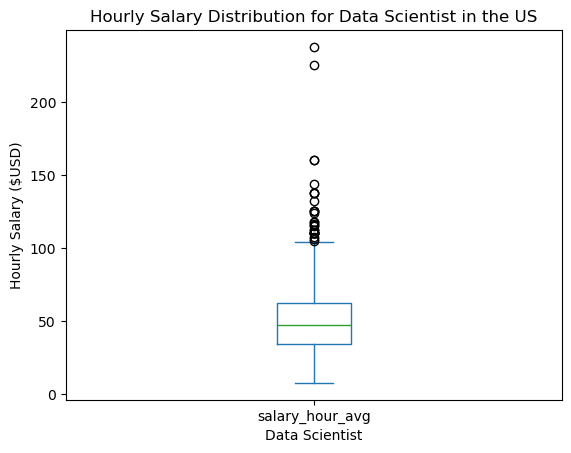

In [10]:
df_DS = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")]
df_DS = df_DS.dropna(subset=["salary_hour_avg"])
df_DS["salary_hour_avg"].plot(kind="box")
plt.xlabel("Data Scientist")
plt.ylabel("Hourly Salary ($USD)")
plt.title("Hourly Salary Distribution for Data Scientist in the US")
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

1. country_data = [df_DA[df_DA["job_country"] == country]["salary_hour_avg"] for country in countries]
* Amaç:
Her ülke (örneğin "United States", "Canada") için sadece o ülkeye ait saatlik maaş verilerini içeren bir liste oluşturmak.

2. for country in countries:
* Bu for döngüsü listedeki her ülke için işlem yapar.

3. df_filtered[df_filtered['job_country'] == country]
* df_filtered: Daha önce filtrelenmiş (örneğin sadece "Data Analyst" ilanlarını içeren) bir DataFrame.
* Bu ifade, job_country sütununda değeri o anki country olan satırları seçer.

4.  ['salary_hour_avg']
* Ülkeye ait bu alt DataFrame’den sadece salary_hour_avg sütunu alınır.

#### Bu işlem sonucunda:

* country_data[0] = ABD için saatlik maaşlar (bir Series)
* country_data[1] = Kanada için saatlik maaşlar (bir Series)

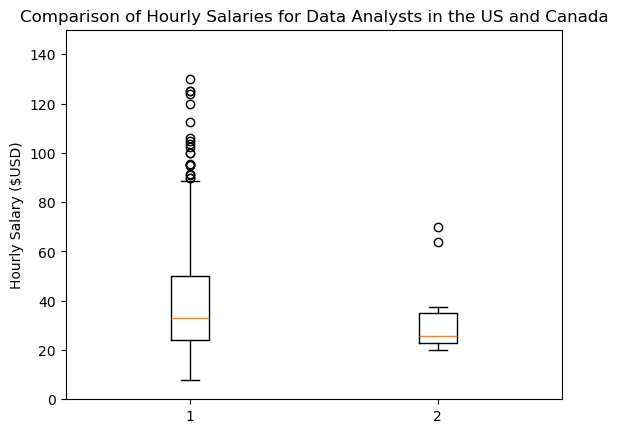

In [19]:
# Code Needed
countries = ['United States', 'Canada']

df_DA = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"].isin(countries))]
df_DA = df_DA.dropna(subset=["salary_hour_avg"])
country_data = [df_DA[df_DA["job_country"] == country]["salary_hour_avg"] for country in countries]

plt.boxplot(country_data, label=countries)
plt.xlabel("")
plt.ylabel("Hourly Salary ($USD)")
plt.ylim(0,150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()


---

## 🟥 Comparison of Hourly Salaries in Germany (2.18.3)

/var/folders/8p/5x_4dm3s1s9dfl4ncvnchlv00000gn/T/ipykernel_2992/2133442833.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


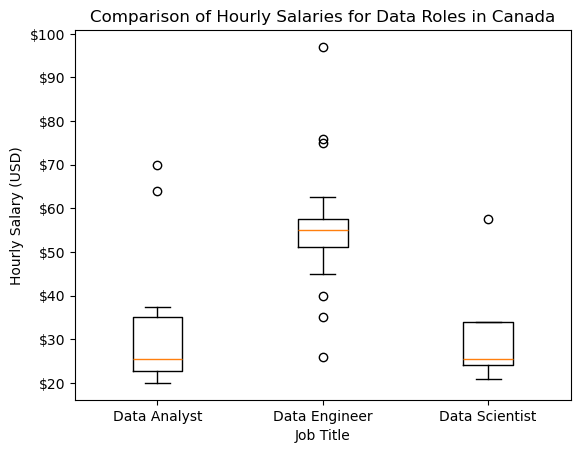

In [ ]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_Canada = df[df["job_country"] == "Canada"].dropna(subset=["salary_hour_avg"])

# Aşağıdaki satır çok önemli: 1. Her bir job (örneğin "Data Analyst") için:df_Canada’dan bu iş unvanına sahip satırları al. salary_year_avg sütununu çek (tek sütunluk Series elde edilir).
# Bu işlem her iş unvanı için tekrar edilir ve sonuçta job_list şöyle bir liste olur: Series(Data Analyst maaşları), Series(Data Engineer maaşları),
#Series(Data Scientist maaşları)


job_list = [df_Canada[df_Canada["job_title_short"] == job]["salary_hour_avg"] for job in job_titles]

fig, ax = plt.subplots() # Matplotlib figür ve eksen (axis) alanı oluşturur. 
ax.boxplot(job_list, labels=job_titles) # Her Series’i bir kutu grafiğe çevirir.
ax.set_xlabel("Job Title")
ax.set_ylabel("Hourly Salary (USD)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title("Comparison of Hourly Salaries for Data Roles in Canada")
plt.show()

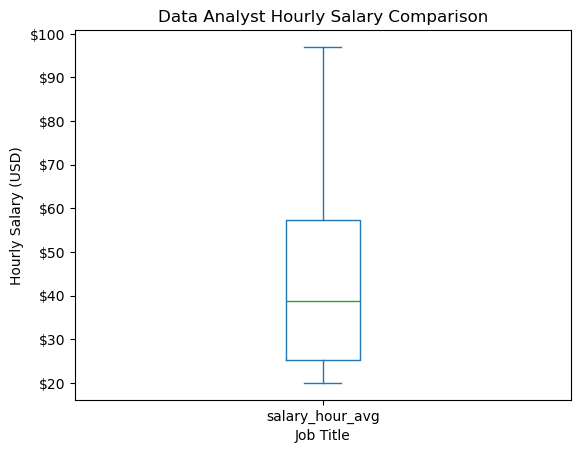

In [32]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
filtered = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "Canada")].dropna(subset=["salary_hour_avg"])
filtered["salary_hour_avg"].plot(kind="box")
plt.xlabel("Job Title")
plt.ylabel("Hourly Salary (USD)")
plt.title("Data Analyst Hourly Salary Comparison")


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.0f}'))


---